# Blueberry Yield

This is a machine learning exercise using a wild blueberry crop yield dataset that I found on Kaggle (https://www.kaggle.com/datasets/saurabhshahane/wild-blueberry-yield-prediction).

The objective is to use machine learning to predict crop yield based on a number of factors, such as the size of the bushes, how many bees are in the area, and various weather parameters.

The first thing we do is import the data:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

BLUEBERRY_FILENAME = 'WildBlueberryPollinationSimulationData.csv'
RANDOM_STATE = 3
    
def load_blueberry_data(blueberry_path=BLUEBERRY_FILENAME):
    csv_path = os.path.join('data', blueberry_path)
    return pd.read_csv(csv_path)

blueberries = load_blueberry_data()

In [2]:
blueberries.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [3]:
blueberries.shape

(777, 18)

In [4]:
blueberries.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [5]:
blueberries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

A couple things stand out upon first glance. First, there are no categorical variables and no null spots, so this should be an easy dataset to process. Second, the `Row#` column is essentially the index, so we can drop that column.

In [6]:
blueberries = blueberries.drop('Row#', axis=1)

In [7]:
blueberries.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


Let's take a quick look at some statistics of the dataset:

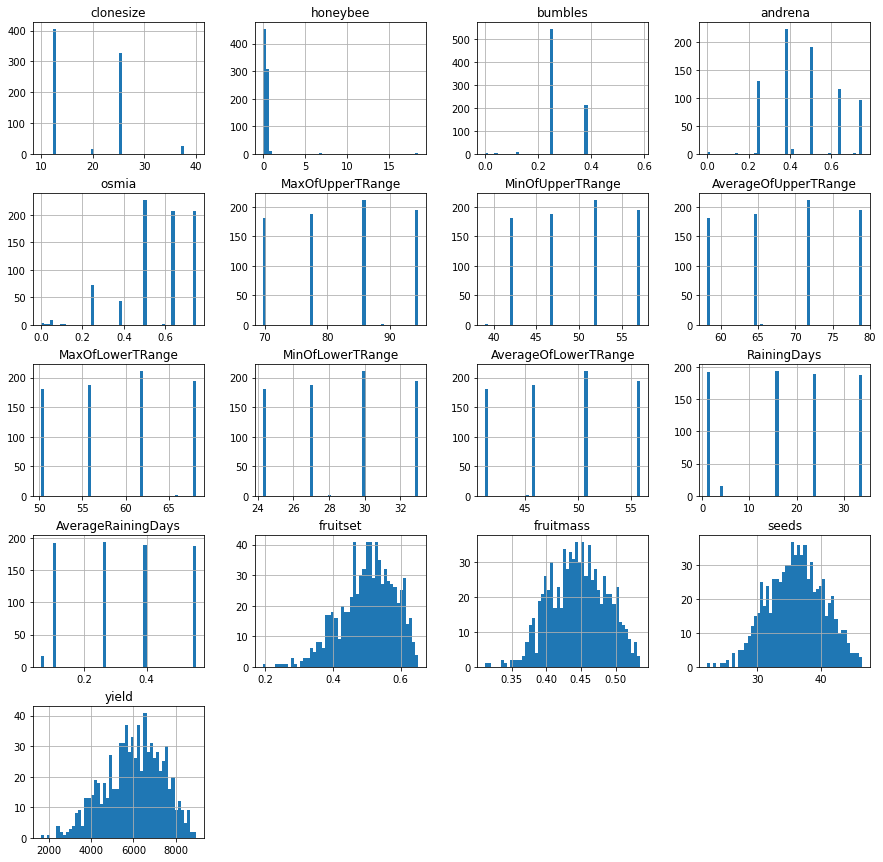

In [8]:
blueberries.hist(bins=50, figsize=(15,15))
plt.show()

The distributions of the data features are also pretty good for a model to use.

In [9]:
from sklearn.model_selection import train_test_split

X = blueberries.drop('yield', axis=1)
y = blueberries['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(543, 16) (234, 16) (543,) (234,)


Now we have the training and testing sets we can write a quick pipeline to process the data. The data is already pretty clean, but depending on which model we want to use, we may have to `StandardScale` the data. For example, a SVM regression will require scaled data, but a `RandomForestRegressor` won't. To be safe, we can go ahead and scale it.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

process_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

Now we can go ahead and process the data:

In [11]:
X_train_prepared = pd.DataFrame(process_pipeline.fit_transform(X_train))
X_test_prepared = pd.DataFrame(process_pipeline.transform(X_test))

With the features processed we can go ahead and train a model. We'll use a couple different models that work well with small datasets with only a medium amount of features: `SVMRegressor` and `RandomForestRegressor`.

In [12]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

svr = SVR()
rf_reg = RandomForestRegressor(random_state=RANDOM_STATE)

svr.fit(X_train_prepared, y_train)
rf_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(random_state=3)

In [13]:
svr_preds = svr.predict(X_train_prepared)
rf_preds = rf_reg.predict(X_train_prepared)

In [14]:
from sklearn.metrics import mean_squared_error

svr_rmse = np.sqrt(mean_squared_error(y_train, svr_preds))
rf_rmse = np.sqrt(mean_squared_error(y_train, rf_preds))

print('SVR RMSE: {:.5f}'.format(svr_rmse))
print(' RF RMSE: {:.5f}'.format(rf_rmse))

SVR RMSE: 1331.01695
 RF RMSE: 61.33216


Looks like the random forest regressor works better! Let's do some cross validation using the random forest model to see how that does.

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_reg, X_train_prepared, 
                         y_train, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

rf_rmse_scores = np.sqrt(-scores)
print(rf_rmse_scores)

[146.55704881 174.89651247 183.94993004 153.82433667 121.88508385
 192.11329083 234.20437713 126.49384841 132.09825616 164.33831776]


We can see that the model still is doing better than the support vector regressor, so we can confidently stick with the trees model. Finally, let's use `GridSearchCV` to find the best hyperparameters.

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [50, 100, 150, 200, 250, 300], 'max_features': [1, 2, 4, 8, 10]}
]

rf_reg_grid = RandomForestRegressor(random_state=RANDOM_STATE)

grid_search = GridSearchCV(rf_reg_grid, param_grid, cv=10, n_jobs=-1, 
                           scoring='neg_mean_squared_error', return_train_score=True)

In [21]:
grid_search.fit(X_train_prepared, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=3), n_jobs=-1,
             param_grid=[{'max_features': [1, 2, 4, 8, 10],
                          'n_estimators': [50, 100, 150, 200, 250, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [22]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 250}

In [23]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

225.14452138850652 {'max_features': 1, 'n_estimators': 50}
221.77057940703804 {'max_features': 1, 'n_estimators': 100}
220.00389771527938 {'max_features': 1, 'n_estimators': 150}
220.4889309009765 {'max_features': 1, 'n_estimators': 200}
220.06537004435623 {'max_features': 1, 'n_estimators': 250}
219.92912326026354 {'max_features': 1, 'n_estimators': 300}
206.46333141062118 {'max_features': 2, 'n_estimators': 50}
204.56826716587108 {'max_features': 2, 'n_estimators': 100}
202.82827237788842 {'max_features': 2, 'n_estimators': 150}
203.8493647219335 {'max_features': 2, 'n_estimators': 200}
200.87416397842824 {'max_features': 2, 'n_estimators': 250}
201.475413454334 {'max_features': 2, 'n_estimators': 300}
174.355633682203 {'max_features': 4, 'n_estimators': 50}
172.61848867853922 {'max_features': 4, 'n_estimators': 100}
171.72225992654646 {'max_features': 4, 'n_estimators': 150}
170.77226084890913 {'max_features': 4, 'n_estimators': 200}
169.72640278404452 {'max_features': 4, 'n_estimat

So the best model was : `159.57000305653713 {'max_features': 8, 'n_estimators': 250}`. Now let's use this model on the test set and see how it generalizes.

In [24]:
best_rf_model = grid_search.best_estimator_

best_rf_model.fit(X_test_prepared, y_test)

RandomForestRegressor(max_features=8, n_estimators=250, random_state=3)

In [25]:
final_preds = best_rf_model.predict(X_test_prepared)

In [26]:
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))

print('RMSE for the Best RandomForest Model: {:.5f}'.format(final_rmse))

RMSE for the Best RandomForest Model: 59.53398


In [27]:
blueberries['yield'].describe()

count     777.000000
mean     6012.849165
std      1356.955318
min      1637.704022
25%      5124.854901
50%      6107.382466
75%      7022.189731
max      8969.401842
Name: yield, dtype: float64

So we get a best error of ~59.5 yield units for this model. This is pretty good and the error is similar to what we got with the training set, so it's reasonable to assume that we are not overfitting and the model is generalizing fairly well. Further, the mean yield is in the thousands and we have a error in the tens. One final check will tell use how good this model is, the R^2 test:

In [28]:
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test, final_preds)

print('R^2 for the Best RandomForest Model: {:.5f}'.format(r2_rf))

R^2 for the Best RandomForest Model: 0.99800


Pretty good!